<h1 align=center style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
مهندسی ویژگی
</font>
</h1>


<h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
مجموعه‌داده
</font>
</h2>



In [188]:
# To-Do (Importing libraries)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score
from sklearn.impute import KNNImputer 
from sklearn.preprocessing import StandardScaler

In [2]:
# TO-DO (Loading and merging data)
dt_train = pd.read_csv('train.csv')
dt_building_meta = pd.read_csv('building_metadata.csv')
dt_train_weather = pd.read_csv('weather_train.csv')
dt_test_weather = pd.read_csv('weather_test.csv')

In [3]:
dt_merge_first = pd.merge(dt_train, dt_building_meta, on='building_id')


In [4]:
dt_merge_final = pd.merge(dt_merge_first, dt_train_weather, on=['site_id', 'timestamp'])

<h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
پیش‌پردازش
</font>
</h2>


In [5]:
dt_meter_zero = dt_merge_final[dt_merge_final['meter'] == 0].drop('meter', axis=1)

In [8]:
dt_meter_zero

,building_id,timestamp,meter_reading,site_id,primary_use,square_feet,year_built,floor_count,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed
0,0,2016-01-01 00:00:00,0.000,0,Education,7432,2008.0,NaN,25.0,6.0,20.0,NaN,1019.7,0.0,0.0
1,1,2016-01-01 00:00:00,0.000,0,Education,2720,2004.0,NaN,25.0,6.0,20.0,NaN,1019.7,0.0,0.0
2,2,2016-01-01 00:00:00,0.000,0,Education,5376,1991.0,NaN,25.0,6.0,20.0,NaN,1019.7,0.0,0.0
3,3,2016-01-01 00:00:00,0.000,0,Education,23685,2002.0,NaN,25.0,6.0,20.0,NaN,1019.7,0.0,0.0
4,4,2016-01-01 00:00:00,0.000,0,Education,116607,1975.0,NaN,25.0,6.0,20.0,NaN,1019.7,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20115153,1444,2016-02-03 11:00:00,4.600,15,Entertainment/public assembly,19619,1914.0,NaN,3.3,NaN,1.1,5.0,1015.0,160.0,9.3
20115154,1445,2016-02-03 11:00:00,5.550,15,Education,4298,NaN,NaN,3.3,NaN,1.1,5.0,1015.0,160.0,9.3
20115155,1446,2016-02-03 11:00:00,10.650,15,Entertainment/public assembly,11265,1997.0,NaN,3.3,NaN,1.1,5.0,1015.0,160.0,9.3
20115156,1447,2016-02-03 11:00:00,205.875,15,Lodging/residential,29775,2001.0,NaN,3.3,NaN,1.1,5.0,1015.0,160.0,9.3


In [6]:
dt_meter_zero['meter_reading'] = dt_meter_zero.apply(lambda row: row['meter_reading'] * 0.29, axis=1)

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
جدول معیارهای آماری داده را رسم کنید. (راهنمایی: تابع <code>describe</code>)


In [7]:
dt_meter_zero.describe()

,building_id,meter_reading,site_id,square_feet,year_built,floor_count,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed
count,1.201741e+07,1.201741e+07,1.201741e+07,1.201741e+07,5.554673e+06,2.958739e+06,1.201358e+07,6.731258e+06,1.201182e+07,9.547231e+06,1.104253e+07,1.138220e+07,1.199412e+07
mean,7.047326e+02,4.948286e+01,6.727073e+00,9.270128e+04,1.968372e+03,3.794100e+00,1.600965e+01,2.284164e+00,8.334990e+00,8.015276e-01,1.016408e+03,1.763599e+02,3.559324e+00
std,4.143301e+02,1.100655e+02,4.935491e+00,1.121460e+05,3.102379e+01,3.359483e+00,1.039774e+01,2.553476e+00,9.836796e+00,7.718845e+00,7.035792e+00,1.128772e+02,2.317835e+00
min,0.000000e+00,0.000000e+00,0.000000e+00,2.830000e+02,1.900000e+03,1.000000e+00,-2.890000e+01,0.000000e+00,-3.500000e+01,-1.000000e+00,9.682000e+02,0.000000e+00,0.000000e+00
25%,3.440000e+02,5.655000e+00,3.000000e+00,2.301200e+04,1.950000e+03,1.000000e+00,8.900000e+00,0.000000e+00,1.100000e+00,0.000000e+00,1.012100e+03,8.000000e+01,2.100000e+00
50%,6.960000e+02,1.820736e+01,5.000000e+00,5.781100e+04,1.970000e+03,3.000000e+00,1.670000e+01,2.000000e+00,9.400000e+00,0.000000e+00,1.016500e+03,1.800000e+02,3.100000e+00
75%,1.061000e+03,4.930500e+01,1.200000e+01,1.161210e+05,1.996000e+03,5.000000e+00,2.390000e+01,4.000000e+00,1.610000e+01,0.000000e+00,1.020700e+03,2.800000e+02,4.600000e+00
max,1.448000e+03,2.313301e+04,1.500000e+01,8.750000e+05,2.017000e+03,2.600000e+01,4.720000e+01,9.000000e+00,2.610000e+01,3.430000e+02,1.045500e+03,3.600000e+02,1.900000e+01


In [8]:
# To-Do (Run df.info() function on data)
dt_meter_zero.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12017408 entries, 0 to 20115157
Data columns (total 15 columns):
 #   Column              Dtype  
---  ------              -----  
 0   building_id         int64  
 1   timestamp           object 
 2   meter_reading       float64
 3   site_id             int64  
 4   primary_use         object 
 5   square_feet         int64  
 6   year_built          float64
 7   floor_count         float64
 8   air_temperature     float64
 9   cloud_coverage      float64
 10  dew_temperature     float64
 11  precip_depth_1_hr   float64
 12  sea_level_pressure  float64
 13  wind_direction      float64
 14  wind_speed          float64
dtypes: float64(10), int64(3), object(2)
memory usage: 1.4+ GB


In [9]:
#‌ ‌Reduce‌ ‌memory‌ ‌usage‌ ‌by‌ ‌converting‌ ‌column‌ ‌data‌ ‌types‌ ‌
def reduce_memory_usage(df, verbose=True):
    # print(df)
    numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
    # Compute memory usage
    start_mem = df.memory_usage().sum() / 1024**2
    # Iterate through each column
    for col in df.columns:
        # print(col)
        col_type = df[col].dtypes
        if col_type in numerics:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)
    # Compute memory usage after reduction
    end_mem = df.memory_usage().sum() / 1024**2
    # Print out the difference between memory usage before and after
    if verbose: print('Mem. usage decreased to {:5.2f} Mb ({:.1f}% reduction)'.format(end_mem, 100 * (start_mem - end_mem) / start_mem))
    return df

In [10]:
# To-Do (Apply reduce_memory_usage function to data)
dt_meter_zero_opt  = reduce_memory_usage(dt_meter_zero)

Mem. usage decreased to 584.50 Mb (60.2% reduction)


In [11]:
# To-Do (Run df.info() function on data)
dt_meter_zero_opt.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12017408 entries, 0 to 20115157
Data columns (total 15 columns):
 #   Column              Dtype  
---  ------              -----  
 0   building_id         int16  
 1   timestamp           object 
 2   meter_reading       float16
 3   site_id             int8   
 4   primary_use         object 
 5   square_feet         int32  
 6   year_built          float16
 7   floor_count         float16
 8   air_temperature     float16
 9   cloud_coverage      float16
 10  dew_temperature     float16
 11  precip_depth_1_hr   float16
 12  sea_level_pressure  float16
 13  wind_direction      float16
 14  wind_speed          float16
dtypes: float16(10), int16(1), int32(1), int8(1), object(2)
memory usage: 584.5+ MB


In [12]:
# To-Do (Remove meter_reading=0 rows
dt_meter_zero_opt = dt_meter_zero_opt[~(dt_meter_zero_opt['meter_reading'] == 0)]

In [13]:
dt_meter_zero_month_added = dt_meter_zero_opt.copy()

In [14]:
# To-Do (Convert timestamp to datetime)
# To-Do (Add month column)
# dt_meter_zero_opt['timestamp']
dt_meter_zero_month_added['month'] = pd.to_datetime(dt_meter_zero_opt['timestamp']).dt.month

In [15]:
dt_meter_zero_month_added['month'] = dt_meter_zero_month_added['month'].astype('int16')

In [16]:
# To-Do (Run df.info() function on data)
dt_meter_zero_month_added.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11488187 entries, 45 to 20115157
Data columns (total 16 columns):
 #   Column              Dtype  
---  ------              -----  
 0   building_id         int16  
 1   timestamp           object 
 2   meter_reading       float16
 3   site_id             int8   
 4   primary_use         object 
 5   square_feet         int32  
 6   year_built          float16
 7   floor_count         float16
 8   air_temperature     float16
 9   cloud_coverage      float16
 10  dew_temperature     float16
 11  precip_depth_1_hr   float16
 12  sea_level_pressure  float16
 13  wind_direction      float16
 14  wind_speed          float16
 15  month               int16  
dtypes: float16(10), int16(2), int32(1), int8(1), object(2)
memory usage: 580.7+ MB


<h2 dir=rtl align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
تحلیل اکتشافی (Exploratory Data Analysis)
</font>
</h2>


In [20]:
dt_meter_zero_month_added

,building_id,timestamp,meter_reading,site_id,primary_use,square_feet,year_built,floor_count,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed,month
45,46,2016-01-01 00:00:00,15.437500,0,Retail,9045,2016.0,NaN,25.000000,6.0,20.000000,NaN,1019.5,0.0,0.000000,1
72,74,2016-01-01 00:00:00,12.468750,0,Parking,387638,1997.0,NaN,25.000000,6.0,20.000000,NaN,1019.5,0.0,0.000000,1
91,93,2016-01-01 00:00:00,15.203125,0,Office,33370,1982.0,NaN,25.000000,6.0,20.000000,NaN,1019.5,0.0,0.000000,1
123,20,2016-01-01 01:00:00,26.671875,0,Education,110272,1977.0,NaN,24.406250,NaN,21.093750,-1.0,1020.0,70.0,1.500000,1
148,46,2016-01-01 01:00:00,15.554688,0,Retail,9045,2016.0,NaN,24.406250,NaN,21.093750,-1.0,1020.0,70.0,1.500000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20115153,1444,2016-02-03 11:00:00,1.333984,15,Entertainment/public assembly,19619,1914.0,NaN,3.300781,NaN,1.099609,5.0,1015.0,160.0,9.296875,2
20115154,1445,2016-02-03 11:00:00,1.609375,15,Education,4298,NaN,NaN,3.300781,NaN,1.099609,5.0,1015.0,160.0,9.296875,2
20115155,1446,2016-02-03 11:00:00,3.087891,15,Entertainment/public assembly,11265,1997.0,NaN,3.300781,NaN,1.099609,5.0,1015.0,160.0,9.296875,2
20115156,1447,2016-02-03 11:00:00,59.718750,15,Lodging/residential,29775,2001.0,NaN,3.300781,NaN,1.099609,5.0,1015.0,160.0,9.296875,2


In [17]:
# To-Do (Exploratory data analysis)
(dt_meter_zero_month_added.isna().sum() / dt_meter_zero_month_added.shape[0]) * 100

building_id            0.000000
timestamp              0.000000
meter_reading          0.000000
site_id                0.000000
primary_use            0.000000
square_feet            0.000000
year_built            55.031529
floor_count           74.691777
air_temperature        0.029317
cloud_coverage        43.884444
dew_temperature        0.044228
precip_depth_1_hr     21.222592
sea_level_pressure     8.340724
wind_direction         5.305598
wind_speed             0.196036
month                  0.000000
dtype: float64

In [18]:
col_float_16 = dt_meter_zero_month_added.select_dtypes(include = ['float16']).columns

In [19]:
dt_meter_zero_month_added[col_float_16] = dt_meter_zero_month_added[col_float_16].astype('float64')

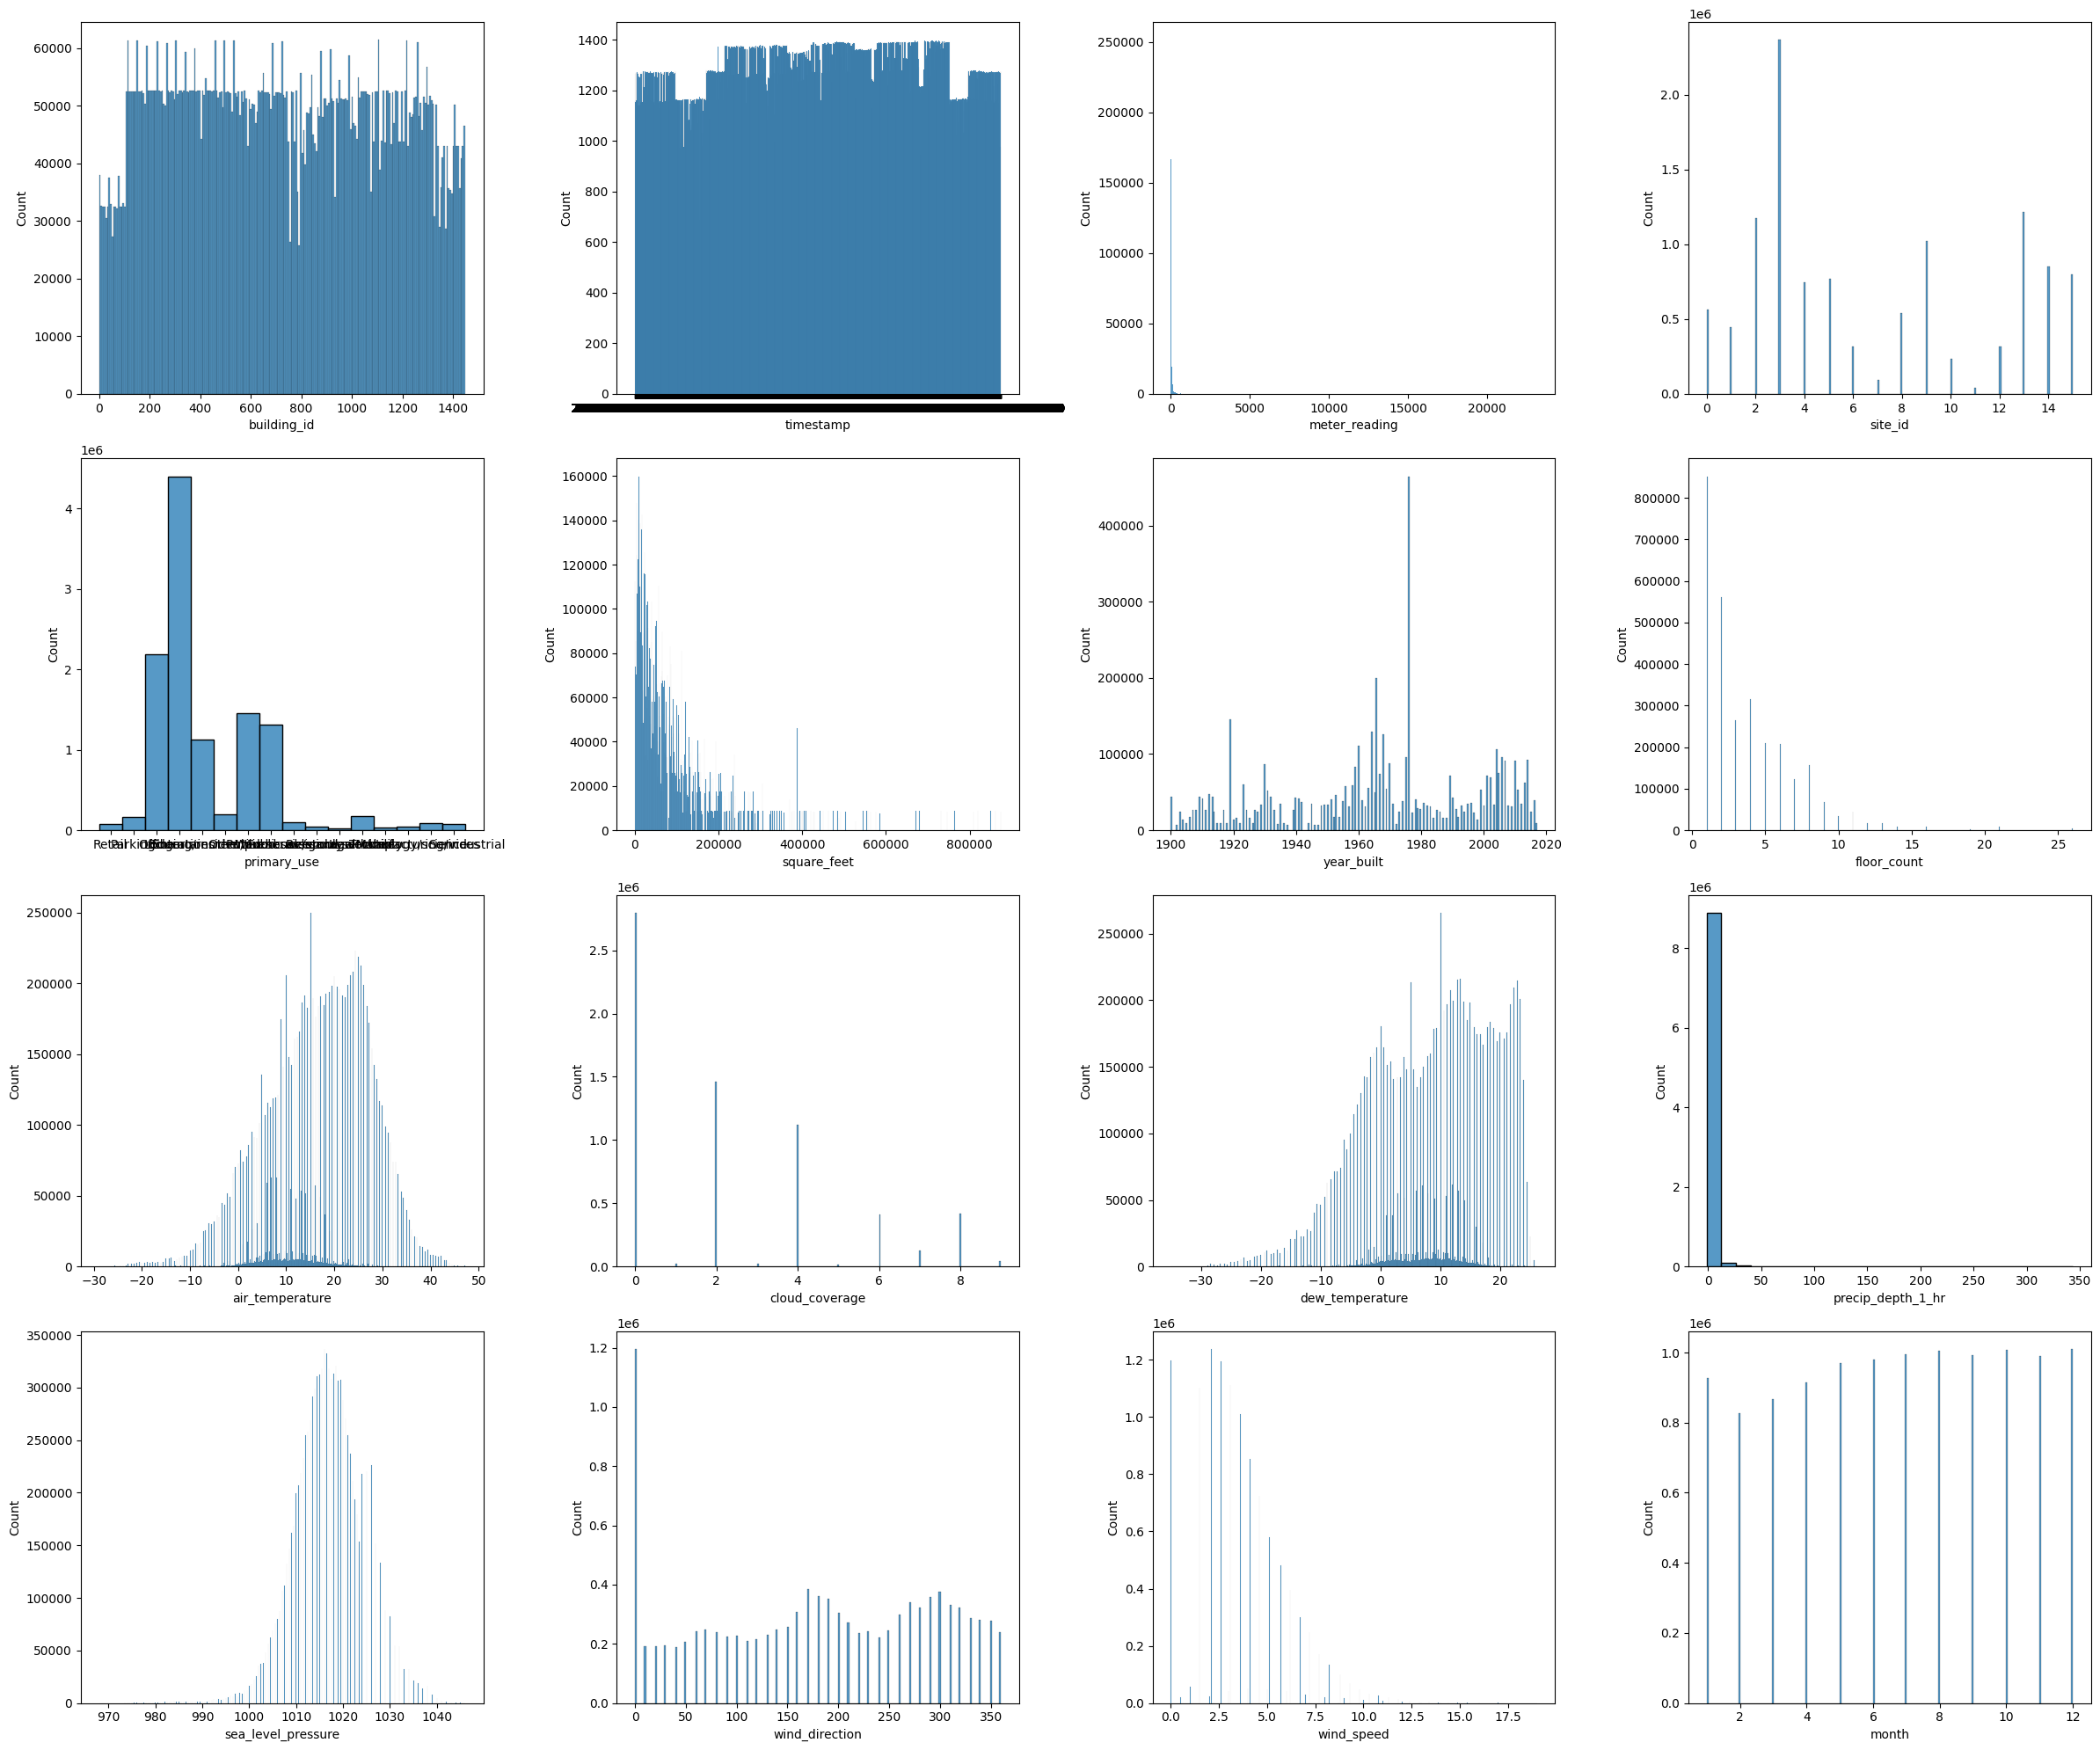

In [20]:
fig, axes = plt.subplots(ncols=len(dt_meter_zero_month_added.columns)//4, nrows = 4, figsize=(24, 20))
axes = axes.flatten()
for ax, col in zip(axes, dt_meter_zero_month_added.columns):
  sns.histplot(dt_meter_zero_month_added[col], ax=ax)
plt.tight_layout() 
plt.show()

In [21]:
dt_site_id_month = dt_meter_zero_month_added.groupby(['site_id', 'month']).agg({'dew_temperature': 'mean'}).reset_index()

In [22]:
dt_site_id_month['dew_temperature'][dt_site_id_month['site_id'] == 1]

12     4.375850
13     2.447250
14     3.013433
15     3.819504
16     8.531682
17    12.880571
18    12.618167
19    12.707504
20    13.133383
21     8.291717
22     4.409243
23     5.194372
Name: dew_temperature, dtype: float64

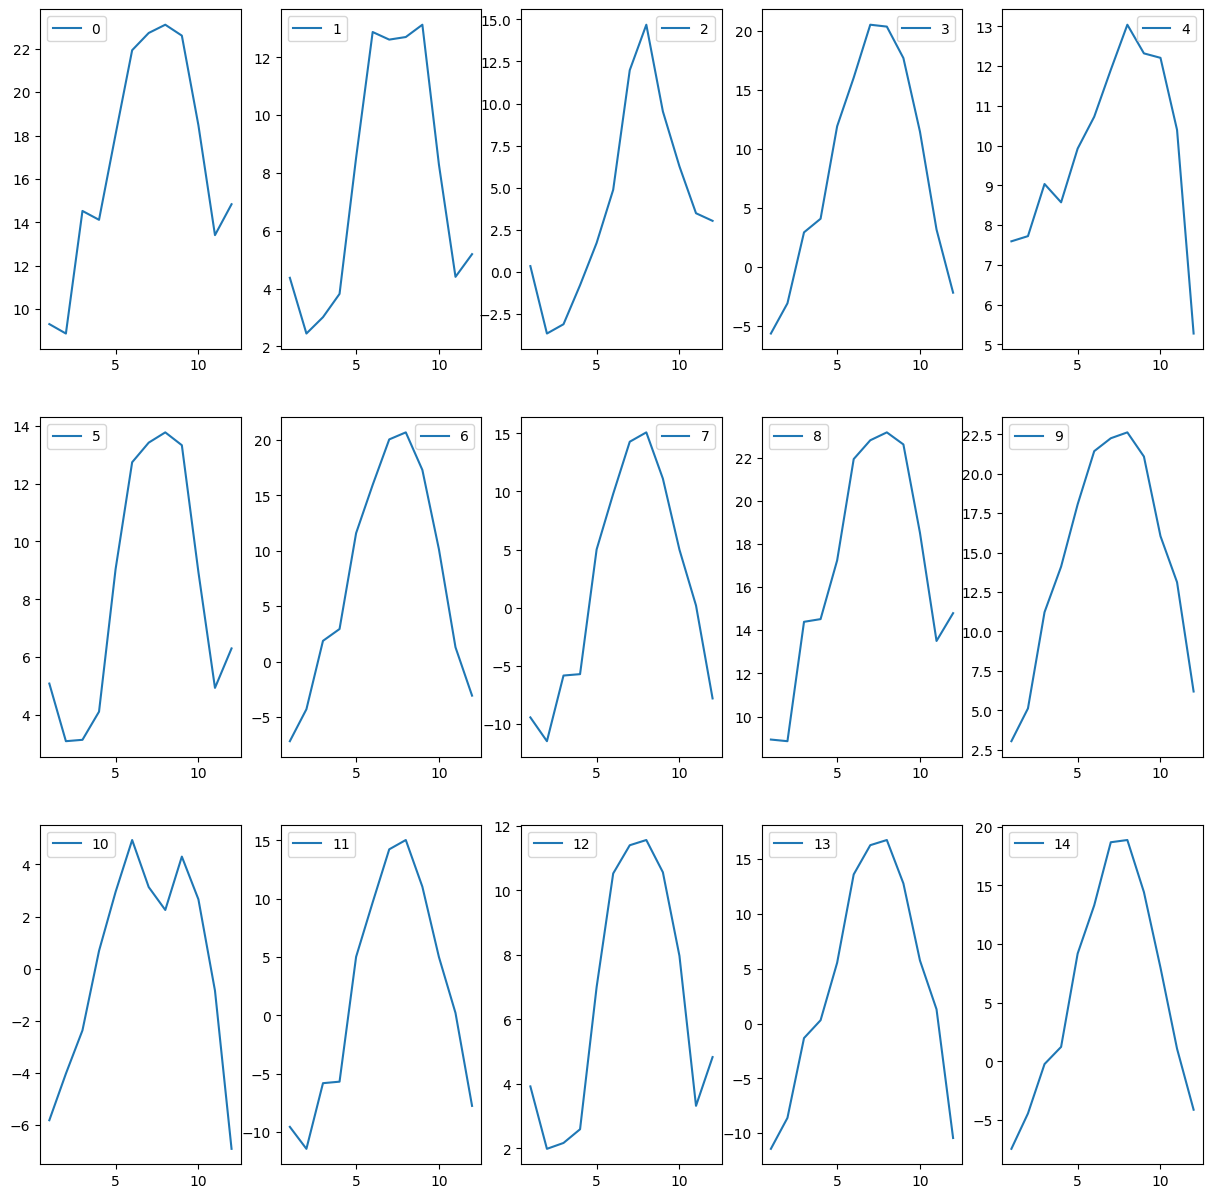

In [23]:
fig, axes = plt.subplots(nrows=3, ncols=5, figsize=(15, 15))
axes = axes.flatten()  
for ax, site_id in zip(axes, dt_site_id_month['site_id'].unique()):
    axes[site_id].plot(dt_site_id_month['month'][dt_site_id_month['site_id'] == site_id], dt_site_id_month['dew_temperature'][dt_site_id_month['site_id'] == site_id], label=site_id)
    axes[site_id].legend() 


<h2 dir=rtl align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
مدل‌سازی اولیه
</font>
</h2>


In [24]:
# To-Do (Basic model)
dt_basic_model = dt_meter_zero_month_added.drop(['floor_count','year_built','timestamp','cloud_coverage'], axis=1)

In [25]:
dt_basic_model.dtypes

building_id             int16
meter_reading         float64
site_id                  int8
primary_use            object
square_feet             int32
air_temperature       float64
dew_temperature       float64
precip_depth_1_hr     float64
sea_level_pressure    float64
wind_direction        float64
wind_speed            float64
month                   int16
dtype: object

In [26]:
dt_basic_model.dropna(inplace=True)

In [27]:
le = LabelEncoder()
dt_basic_model['primary_use'] = le.fit_transform(dt_basic_model['primary_use'])

In [28]:
X = dt_basic_model.drop('meter_reading', axis=1)
y = dt_basic_model['meter_reading']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [29]:
X_train.dtypes

building_id             int16
site_id                  int8
primary_use             int32
square_feet             int32
air_temperature       float64
dew_temperature       float64
precip_depth_1_hr     float64
sea_level_pressure    float64
wind_direction        float64
wind_speed            float64
month                   int16
dtype: object

In [30]:
tree_model = DecisionTreeRegressor(max_depth=20)
tree_model.fit(X_train, y_train)
y_pred = tree_model.predict(X_test)
r2_score_basic_model = r2_score(y_test, y_pred)

In [31]:
r2_score_basic_model

0.909582210379061

<h2 dir=rtl align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
مهندسی ویژگی
</font>
</h2>


<details dir="rtl" style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<summary dir="rtl" style="color:orange"><b>راهنمایی: <code>NaN</code> شدن میانگین</b></summary>
اگر مقدار میانگین کل شما برابر با <code>NaN</code> می شود به تایپ ستون و محدودیت آن توجه کنید.
</details>

In [32]:
# To-Do (Handling missing values 1)
dt_sec_try = dt_meter_zero_month_added.copy()

In [33]:
dt_sec_try.columns

Index(['building_id', 'timestamp', 'meter_reading', 'site_id', 'primary_use',
       'square_feet', 'year_built', 'floor_count', 'air_temperature',
       'cloud_coverage', 'dew_temperature', 'precip_depth_1_hr',
       'sea_level_pressure', 'wind_direction', 'wind_speed', 'month'],
      dtype='object')

In [165]:
train_data, test_data = train_test_split(dt_sec_try, test_size=0.3, random_state=42)


In [91]:
train_data['site_id'].nunique()

16

In [47]:
(train_data.isna().sum() / train_data.shape[0]) * 100

building_id            0.000000
timestamp              0.000000
meter_reading          0.000000
site_id                0.000000
primary_use            0.000000
square_feet            0.000000
year_built            55.026418
floor_count           74.669145
air_temperature        0.000000
cloud_coverage        43.886614
dew_temperature        0.044878
precip_depth_1_hr     21.235257
sea_level_pressure     0.000000
wind_direction         5.303075
wind_speed             0.196052
month                  0.000000
dtype: float64

array([[<Axes: title={'center': 'building_id'}>,
        <Axes: title={'center': 'meter_reading'}>,
        <Axes: title={'center': 'site_id'}>,
        <Axes: title={'center': 'square_feet'}>],
       [<Axes: title={'center': 'year_built'}>,
        <Axes: title={'center': 'floor_count'}>,
        <Axes: title={'center': 'air_temperature'}>,
        <Axes: title={'center': 'cloud_coverage'}>],
       [<Axes: title={'center': 'dew_temperature'}>,
        <Axes: title={'center': 'precip_depth_1_hr'}>,
        <Axes: title={'center': 'sea_level_pressure'}>,
        <Axes: title={'center': 'wind_direction'}>],
       [<Axes: title={'center': 'wind_speed'}>,
        <Axes: title={'center': 'month'}>, <Axes: >, <Axes: >]],
      dtype=object)

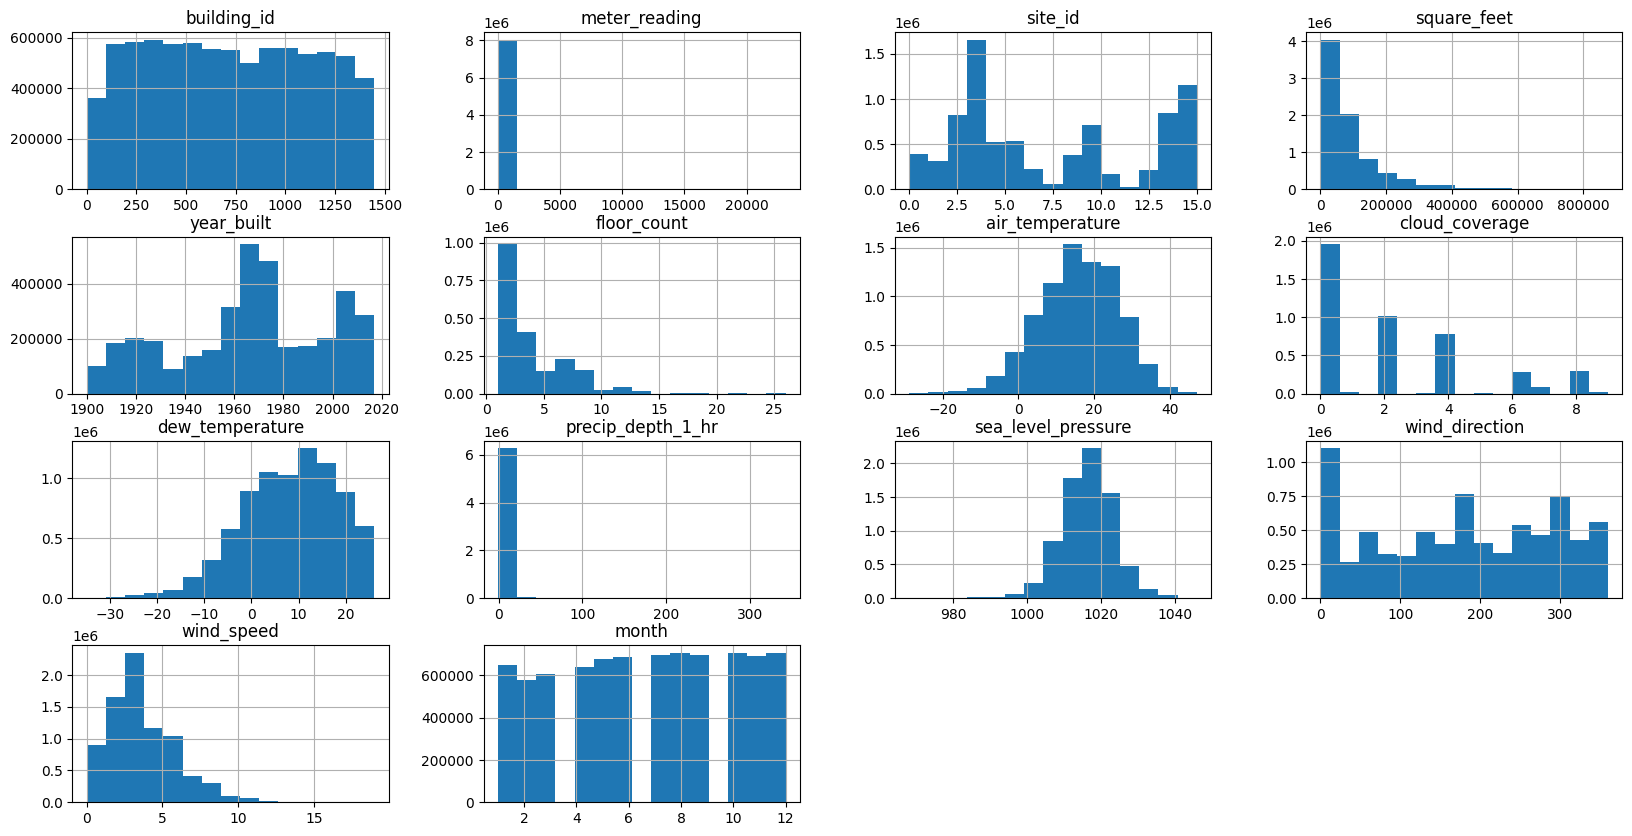

In [36]:
train_data.hist(bins=15, figsize=(20,10))

In [38]:
train_data.describe().loc[['count', 'mean', '50%']]

,building_id,meter_reading,site_id,square_feet,year_built,floor_count,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed,month
count,8.041730e+06,8.041730e+06,8.041730e+06,8.041730e+06,3.616654e+06,2.037039e+06,8.039343e+06,4.512487e+06,8.038121e+06,6.334048e+06,7.370191e+06,7.615271e+06,8.025964e+06,8.041730e+06
mean,7.200927e+02,5.176576e+01,6.879251e+00,9.272353e+04,1.966552e+03,3.765062e+00,1.588081e+01,2.277440e+00,8.177177e+00,7.852370e-01,1.016353e+03,1.764241e+02,3.560373e+00,6.669997e+00
50%,7.080000e+02,1.987500e+01,5.000000e+00,5.819600e+04,1.968000e+03,3.000000e+00,1.609375e+01,2.000000e+00,9.000000e+00,0.000000e+00,1.016500e+03,1.800000e+02,3.099609e+00,7.000000e+00


In [39]:
dt_site_id_temp = train_data.groupby('site_id')['air_temperature'].mean()


In [40]:
train_data['air_temperature'] = train_data['air_temperature'].astype('float16')


In [41]:
dt_site_id_temp

site_id
0     24.929764
1     11.708782
2     24.929641
3     15.527113
4     15.228063
5     10.861244
6     15.166441
7      7.994520
8     22.687336
9     21.330070
10    11.418424
11     7.921545
12     9.851732
13     9.847083
14    13.175373
15    10.815152
Name: air_temperature, dtype: float64

In [42]:
train_data['sea_level_pressure'].fillna(train_data['sea_level_pressure'].mean(), inplace=True)

In [43]:
def fillna_mean(row, row_name,mean_temps):
    if pd.isna(row[row_name]):
        return mean_temps[row['site_id']]
    return row[row_name]


In [44]:
train_data['air_temperature'] = train_data.apply(fillna_mean, axis=1, mean_temps=dt_site_id_temp, row_name='air_temperature')

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
سه ستون <code>wind_speed</code>، <code>wind_direction</code> و <code>dew_temperature</code>  دارای چولگی هستند.
<br>
</font>
</p>

In [45]:
# To-Do (Analysing wind_direction, wind_speed and dew_temperature)
dt_site_id_mean_median = train_data.groupby('site_id').agg({'wind_direction':['mean','median'], 'wind_speed':['mean','median'], 'dew_temperature':['mean','median']})


In [46]:
dt_site_id_mean_median.columns

MultiIndex([( 'wind_direction',   'mean'),
            ( 'wind_direction', 'median'),
            (     'wind_speed',   'mean'),
            (     'wind_speed', 'median'),
            ('dew_temperature',   'mean'),
            ('dew_temperature', 'median')],
           )

Text(0.5, 1.0, 'dew_temperature')

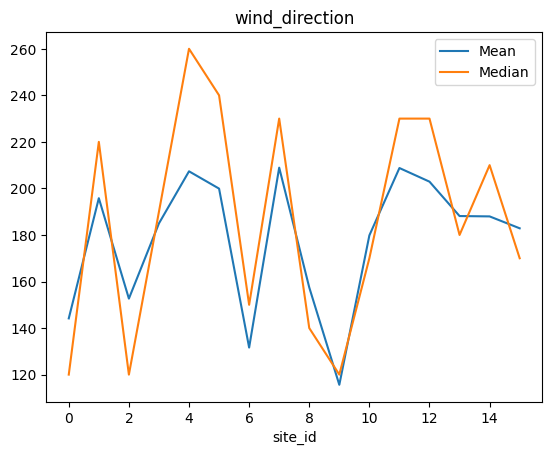

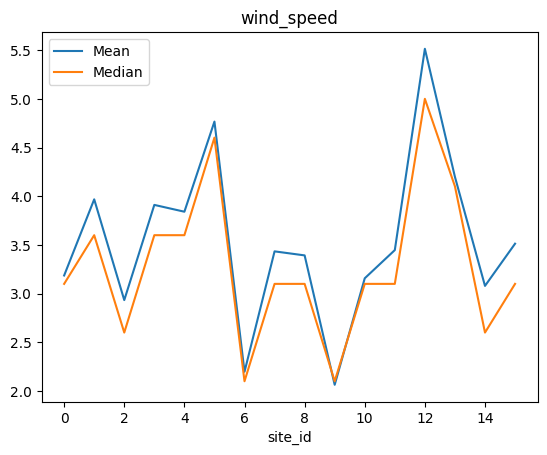

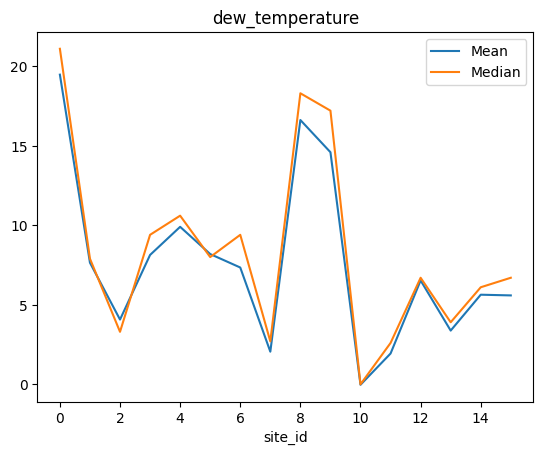

In [48]:
dt_site_id_mean_median[[( 'wind_direction', 'mean'), ( 'wind_direction', 'median')]].plot()
plt.legend(['Mean', 'Median'])
plt.title('wind_direction')

dt_site_id_mean_median[[( 'wind_speed', 'mean'), ( 'wind_speed', 'median')]].plot()
plt.legend(['Mean', 'Median'])
plt.title('wind_speed')

dt_site_id_mean_median[[( 'dew_temperature', 'mean'), ( 'dew_temperature', 'median')]].plot()
plt.legend(['Mean', 'Median'])
plt.title('dew_temperature')



<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
با توجه به مشاهده‌‌ی این‌که ستون‌های <code>dew_temperature</code> و <code>wind_speed</code> تفاوت چندانی
در مقدار میانگین و میانه ندارند، برای این دو ستون می‌توان از مقدار میانگین استفاده کرد.
<br>
</font>
</p>

In [80]:
def fillna_dt(row, row_name, col_name,mean_temps):
    if pd.isna(row[row_name]):
        return mean_temps.loc[row['site_id'], col_name]
    return row[row_name]


In [84]:
train_data['wind_speed'] = train_data.apply(fillna_dt, axis=1, mean_temps=dt_site_id_mean_median, row_name='wind_speed', col_name = ('wind_speed',   'mean'))

In [83]:
train_data['dew_temperature'] = train_data.apply(fillna_dt, axis=1, mean_temps=dt_site_id_mean_median, row_name='dew_temperature', col_name = ('dew_temperature',   'mean'))

In [49]:
# mean_wind_speed = dt_site_id_mean_median[('wind_speed', 'mean')]
# train_data['wind_speed'] = train_data['wind_speed'].fillna(train_data['site_id'].map(mean_wind_speed))
# mean_dew_temperature = dt_site_id_mean_median[('dew_temperature', 'mean')]
# train_data['dew_temperature'] = train_data['dew_temperature'].fillna(train_data['site_id'].map(mean_dew_temperature))


In [ ]:
# To-Do (Handling missing values 2)

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
 <a target="_blank" href="https://en.wikipedia.org/wiki/Interpolation">درون‌یابی (Interpolation)


In [50]:
train_data_sort = train_data.sort_values(by=['site_id', 'timestamp'])

In [51]:
# To-Do (Handling missing values 3)
train_data_sort['cloud_coverage'] = train_data_sort['cloud_coverage'].interpolate()

<details dir="rtl" style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<summary dir="rtl" style="color:orange"><b>راهنمایی: مدیریت گزارش‌نشدن بارش</b></summary>
در برخی از ماه‌ها، هیچ روزی مقدار بارش گزارش نشده است. میانگین این ماه ها را <code dir=ltr>-1</code> در نظر بگیرید.
</details>

In [58]:
train_data_sort[(train_data_sort['cloud_coverage'] == 0) & (pd.isna(train_data_sort['precip_depth_1_hr']))]

,building_id,timestamp,meter_reading,site_id,primary_use,square_feet,year_built,floor_count,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed,month


In [55]:
# To-Do (Handling missing values 4)
train_data_sort[(train_data_sort['cloud_coverage'] == 0) & (pd.isna(train_data_sort['precip_depth_1_hr']))] = 0

In [76]:
(train_data_sort_test.isna().sum() / train_data_sort_test.shape[0]) * 100

building_id           0.000000
timestamp             0.000000
meter_reading         0.000000
site_id               0.000000
primary_use           0.000000
square_feet           0.000000
floor_count           0.000000
air_temperature       0.000000
cloud_coverage        0.000000
dew_temperature       0.000000
precip_depth_1_hr     0.000000
sea_level_pressure    0.000000
wind_direction        1.381829
wind_speed            0.000000
month                 0.000000
dtype: float64

In [59]:
dt_mean_1hr = train_data_sort.groupby('month').agg({'precip_depth_1_hr': 'mean'})

In [60]:
mean_1hr = dt_mean_1hr['precip_depth_1_hr']
train_data_sort['precip_depth_1_hr'] = train_data_sort['precip_depth_1_hr'].fillna(train_data_sort['month'].map(mean_1hr))


<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
ستون <code>year_built</code> را حذف کرده و همچنین فعلا سطرهایی که تعداد طبقات (<code>floor_count</code>) آن‌ها ذکر نشده را نیز حذف می‌کنیم (در نتیجه یک کپی از دیتا فریم اصلی خود داشته باشید).
</font>
</p>

In [66]:
train_data_sort_test = train_data_sort.copy()

In [75]:
train_data_sort_test

,building_id,timestamp,meter_reading,site_id,primary_use,square_feet,floor_count,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed,month
1076701,136,2016-01-01 00:00:00,4.773438,1,Lodging/residential,56467,9.0,3.800781,0.321608,2.400391,0.520189,1021.0,240.0,3.099609,1
1076682,119,2016-01-01 00:00:00,63.562500,1,Education,91149,7.0,3.800781,0.311558,2.400391,0.520189,1021.0,240.0,3.099609,1
1076720,151,2016-01-01 00:00:00,5.453125,1,Office,30495,8.0,3.800781,0.301508,2.400391,0.520189,1021.0,240.0,3.099609,1
1076702,137,2016-01-01 00:00:00,4.132812,1,Entertainment/public assembly,64024,6.0,3.800781,0.291457,2.400391,0.520189,1021.0,240.0,3.099609,1
1076705,139,2016-01-01 00:00:00,3.656250,1,Public services,56629,6.0,3.800781,0.281407,2.400391,0.520189,1021.0,240.0,3.099609,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20111835,0,0,0.000000,0,0,0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0
20111838,0,0,0.000000,0,0,0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0
20111748,0,0,0.000000,0,0,0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0
20111889,0,0,0.000000,0,0,0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0


In [74]:
# To-Do (Make a copy and remove year_built and floor_count columns)
# train_data_sort_test.drop('year_built', axis=1, inplace=True)
train_data_sort_test.dropna(subset=['floor_count'], inplace=True)

In [77]:
train_data_sort_test['primary_use'].nunique()

14

In [80]:
# To-Do (Analysing primary_use column)
train_data_groupby_primary = train_data_sort_test.groupby('primary_use').agg({'wind_direction' : 'count', 'meter_reading': 'mean'})


In [112]:
train_data_groupby_primary.sort_values(by='meter_reading')

,wind_direction,meter_reading,label per
primary_use,,,
0,992264,0.000000,45.151550
Warehouse/storage,11000,4.766129,0.500539
Other,66099,6.108353,3.007740
Healthcare,525,6.182409,0.023889
Parking,14051,9.427848,0.639371
Retail,12152,11.381212,0.552959
Utility,5930,15.268393,0.269836
Public services,191850,16.060494,8.729859
Office,76855,20.441231,3.497177


In [97]:
train_data_groupby_primary['label per'] = (train_data_groupby_primary['wind_direction'] / train_data_groupby_primary['wind_direction'].sum()) * 100

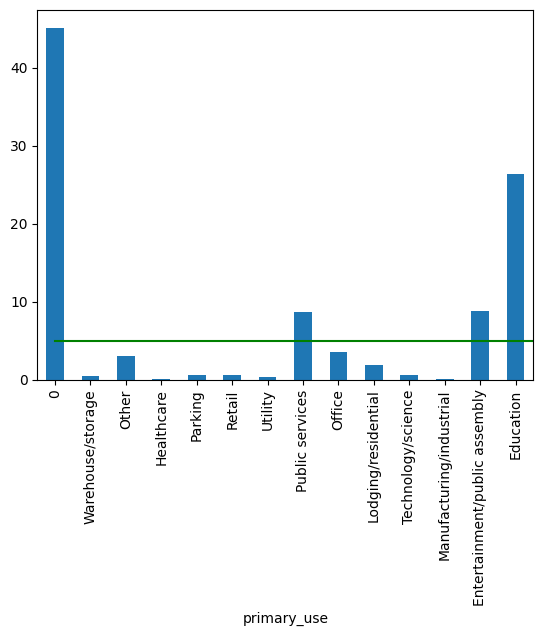

In [110]:
x = [0, 15]
y = [5, 5] 
train_data_groupby_primary.sort_values(by='meter_reading')['label per'].plot.bar()
plt.plot(x, y, c='g')

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
با توجه به نمودار  بهتر است چهار ستون <code>Other</code>، <code>Utility</code>، <code>Retail</code> و <code>Parking</code> که میانگین مصرف مشابهی دارند را در گروه <code>Other</code> قرار دهیم و سپس با استفاده از  <code>LabelEncoder</code> برچسب‌ها را کدگذاری کنیم.
</font>
</p>

In [114]:
def label_change(row):
    label_list = ['Parking', 'Other', 'Utility', 'Retail']
    if row in label_list:
        return 'Other'
    return row

In [126]:
train_data_sort_test['primary_use'] = train_data_sort_test.apply(lambda row: label_change(row['primary_use']), axis=1)

In [137]:
train_data_sort_test = train_data_sort_test[~(train_data_sort_test == 0).all(axis=1)]

In [139]:
train_data_sort_test.loc[:, 'primary_use'] = le.fit_transform(train_data_sort_test['primary_use'])

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
دو ستون <code>month</code> و <code>timestamp</code> را از داده‌ها حذف شود و ستون هدف را از ماتریس ویژگی‌ها جدا شود
</font>
</p>

In [151]:
test_data.isna().sum()

building_id                 0
timestamp                   0
meter_reading               0
site_id                     0
primary_use                 0
square_feet                 0
year_built            1897049
floor_count           2576040
air_temperature           981
cloud_coverage        1512284
dew_temperature          1472
precip_depth_1_hr      730409
sea_level_pressure     286659
wind_direction         183058
wind_speed               6755
month                       0
dtype: int64

In [129]:
# To-Do (Remove month and timestamp columns and split target column)
train_data_sort_test.drop(['month', 'timestamp'], axis=1, inplace=True)

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
<a target="_blank" href="https://scikit-learn.org/stable/modules/generated/sklearn.impute.KNNImputer.html">KNNImputer</a> <code>KNNImputer</code> 
</p>

In [141]:
train_data_sort_test.shape

(1236159, 13)

In [143]:
# To-Do (KNNImputer)
imputer = KNNImputer(n_neighbors=3, metric='nan_euclidean', add_indicator=False)
train_data_sort_test_imputed = imputer.fit_transform(train_data_sort_test)

In [147]:
train_data_sort_test_imputed = pd.DataFrame(train_data_sort_test_imputed, columns=train_data_sort_test.columns)

In [148]:
train_data_sort_test_imputed

,building_id,meter_reading,site_id,primary_use,square_feet,floor_count,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed
0,136.0,4.773438,1.0,3.0,56467.0,9.0,3.800781,0.321608,2.400391,0.520189,1021.0,240.0,3.099609
1,119.0,63.562500,1.0,0.0,91149.0,7.0,3.800781,0.311558,2.400391,0.520189,1021.0,240.0,3.099609
2,151.0,5.453125,1.0,5.0,30495.0,8.0,3.800781,0.301508,2.400391,0.520189,1021.0,240.0,3.099609
3,137.0,4.132812,1.0,1.0,64024.0,6.0,3.800781,0.291457,2.400391,0.520189,1021.0,240.0,3.099609
4,139.0,3.656250,1.0,7.0,56629.0,6.0,3.800781,0.281407,2.400391,0.520189,1021.0,240.0,3.099609
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1236154,1051.0,4.093750,12.0,0.0,28406.0,1.0,6.500000,8.000000,5.300781,0.704516,1019.5,340.0,6.000000
1236155,1057.0,18.421875,12.0,0.0,26372.0,4.0,6.500000,8.000000,5.300781,0.704516,1019.5,340.0,6.000000
1236156,1034.0,1.430664,12.0,6.0,3907.0,1.0,6.500000,8.000000,5.300781,0.704516,1019.5,340.0,6.000000
1236157,1050.0,5.648438,12.0,5.0,50493.0,2.0,6.500000,8.000000,5.300781,0.704516,1019.5,340.0,6.000000


In [156]:
test_data.isna().sum()

building_id                0
timestamp                  0
meter_reading              0
site_id                    0
primary_use                0
square_feet                0
year_built            293398
floor_count                0
air_temperature          288
cloud_coverage        492536
dew_temperature          428
precip_depth_1_hr     446664
sea_level_pressure    236223
wind_direction         19491
wind_speed               859
month                      0
dtype: int64

In [166]:
test_data.dropna(subset='floor_count', inplace=True)

In [167]:
test_data['sea_level_pressure'].fillna(train_data['sea_level_pressure'].mean(), inplace=True)

In [168]:
def fillna_mean(row, row_name,mean_temps):
    if pd.isna(row[row_name]):
        return mean_temps[row['site_id']]
    return row[row_name]


In [169]:
test_data['air_temperature'] = test_data.apply(fillna_mean, axis=1, mean_temps=dt_site_id_temp, row_name='air_temperature')

In [170]:
mean_wind_speed = dt_site_id_mean_median[('wind_speed', 'mean')]
test_data['wind_speed'] = test_data['wind_speed'].fillna(test_data['site_id'].map(mean_wind_speed))
mean_dew_temperature = dt_site_id_mean_median[('dew_temperature', 'mean')]
test_data['dew_temperature'] = test_data['dew_temperature'].fillna(test_data['site_id'].map(mean_dew_temperature))


In [171]:
test_data['cloud_coverage'] = test_data['cloud_coverage'].interpolate()

In [172]:
test_data[(test_data['cloud_coverage'] == 0) & (pd.isna(test_data['precip_depth_1_hr']))] = 0

In [173]:
mean_1hr = dt_mean_1hr['precip_depth_1_hr']
test_data['precip_depth_1_hr'] = test_data['precip_depth_1_hr'].fillna(test_data['month'].map(mean_1hr))


In [187]:
(test_data_imputed.isna().sum() / test_data_imputed.shape[0]) * 100

building_id           0.0
meter_reading         0.0
site_id               0.0
primary_use           0.0
square_feet           0.0
floor_count           0.0
air_temperature       0.0
cloud_coverage        0.0
dew_temperature       0.0
precip_depth_1_hr     0.0
sea_level_pressure    0.0
wind_direction        0.0
wind_speed            0.0
dtype: float64

In [175]:
test_data.drop('year_built', axis=1, inplace=True)

In [177]:
def label_change(row):
    label_list = ['Parking', 'Other', 'Utility', 'Retail']
    if row in label_list:
        return 'Other'
    return row

In [178]:
test_data['primary_use'] = test_data.apply(lambda row: label_change(row['primary_use']), axis=1)

In [179]:
test_data = test_data[~(test_data == 0).all(axis=1)]

In [182]:
test_data.loc[:, 'primary_use'] = le.fit_transform(test_data['primary_use'])

In [184]:
test_data.drop(['month', 'timestamp'], axis=1, inplace=True)

In [185]:
imputer = KNNImputer(n_neighbors=3, metric='nan_euclidean', add_indicator=False)
test_data_imputed = imputer.fit_transform(test_data)
test_data_imputed = pd.DataFrame(test_data_imputed, columns=test_data.columns)

In [186]:
test_data_imputed

,building_id,meter_reading,site_id,primary_use,square_feet,floor_count,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed
0,811.0,1.933594,8.0,7.0,4848.0,1.0,20.593750,2.666667,18.906250,0.000000,1017.50000,160.0,3.599609
1,702.0,2.957031,5.0,0.0,24251.0,2.0,12.000000,1.944444,12.000000,0.620901,1016.35314,340.0,1.500000
2,813.0,4.132812,8.0,7.0,5630.0,1.0,13.296875,2.333333,-1.099609,0.000000,1021.00000,340.0,7.199219
3,644.0,95.187500,4.0,1.0,261091.0,3.0,10.000000,0.000000,8.296875,0.000000,1023.50000,120.0,1.500000
4,723.0,76.937500,5.0,0.0,160038.0,4.0,3.000000,1.000000,1.000000,0.559436,1016.35314,310.0,3.599609
...,...,...,...,...,...,...,...,...,...,...,...,...,...
696422,836.0,5.765625,8.0,7.0,8168.0,1.0,17.203125,0.000000,11.703125,0.000000,1013.50000,270.0,6.699219
696423,585.0,57.406250,4.0,7.0,132394.0,7.0,18.296875,2.000000,12.203125,0.620901,1013.50000,250.0,3.099609
696424,696.0,9.109375,5.0,0.0,19041.0,2.0,7.000000,2.000000,4.000000,0.559436,1016.35314,70.0,4.601562
696425,672.0,2.371094,5.0,4.0,6329.0,2.0,16.000000,2.000000,13.000000,1.079283,1016.35314,270.0,8.796875


In [218]:
train_data_sort_test_imputed.head()

,building_id,meter_reading,site_id,primary_use,square_feet,floor_count,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed
0,136.0,4.773438,1.0,3.0,56467.0,9.0,3.800781,0.321608,2.400391,0.520189,1021.0,240.0,3.099609
1,119.0,63.562500,1.0,0.0,91149.0,7.0,3.800781,0.311558,2.400391,0.520189,1021.0,240.0,3.099609
2,151.0,5.453125,1.0,5.0,30495.0,8.0,3.800781,0.301508,2.400391,0.520189,1021.0,240.0,3.099609
3,137.0,4.132812,1.0,1.0,64024.0,6.0,3.800781,0.291457,2.400391,0.520189,1021.0,240.0,3.099609
4,139.0,3.656250,1.0,7.0,56629.0,6.0,3.800781,0.281407,2.400391,0.520189,1021.0,240.0,3.099609


In [215]:
train_data_sort_test_imputed.nunique()

building_id              352
meter_reading          14490
site_id                    7
primary_use               10
square_feet              345
floor_count               18
air_temperature          595
cloud_coverage        257806
dew_temperature          521
precip_depth_1_hr        120
sea_level_pressure       132
wind_direction           114
wind_speed                57
dtype: int64

In [220]:
# To-Do (StandardScaler)
sc = StandardScaler()
train_data_sc = sc.fit_transform(train_data_sort_test_imputed)
test_data_sc = sc.fit_transform(train_data_sort_test_imputed)

In [223]:
train_data_sc = pd.DataFrame(train_data_sc, columns=train_data_sort_test_imputed.columns)
test_data_sc = pd.DataFrame(test_data_sc, columns=test_data_imputed.columns)

In [196]:
test_data_imputed.head()

,building_id,meter_reading,site_id,primary_use,square_feet,floor_count,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed
0,811.0,1.933594,8.0,7.0,4848.0,1.0,20.593750,2.666667,18.906250,0.000000,1017.50000,160.0,3.599609
1,702.0,2.957031,5.0,0.0,24251.0,2.0,12.000000,1.944444,12.000000,0.620901,1016.35314,340.0,1.500000
2,813.0,4.132812,8.0,7.0,5630.0,1.0,13.296875,2.333333,-1.099609,0.000000,1021.00000,340.0,7.199219
3,644.0,95.187500,4.0,1.0,261091.0,3.0,10.000000,0.000000,8.296875,0.000000,1023.50000,120.0,1.500000
4,723.0,76.937500,5.0,0.0,160038.0,4.0,3.000000,1.000000,1.000000,0.559436,1016.35314,310.0,3.599609


In [222]:
test_data_sc.drop('building_id', axis=1, inplace=True)

In [225]:
train_data_sc.drop('building_id', axis=1, inplace=True)

In [230]:
X_train = train_data_sc.drop('meter_reading', axis=1)
y_train = train_data_sc['meter_reading']
X_test = test_data_sc.drop('meter_reading', axis=1)
y_test = test_data_sc['meter_reading']

In [228]:
# To-Do (Modeling)
dc = DecisionTreeRegressor(max_depth=20)
dc.fit(X_train, y_train)
y_pred = dc.predict(X_test)

In [231]:
r2_score_basic_model = r2_score(y_test, y_pred)

In [232]:
r2_score_basic_model

0.9873960004493467